# Dataset Processing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/3d/tnk1dqns7kd6x1yqw6m752z00000gn/T/ipykernel_75069/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Energy

In [45]:
energy = pd.read_csv("data/raw/energy.csv")

orientations = {2: 'north', 3: 'east', 4: 'south', 5: 'west'}
energy["orientation"] = energy["orientation"].apply(lambda x: orientations[x])

glazings = {0: 'unknown', 1: 'uniform', 2: 'north', 3:'east', 4:'south', 5:'west'}
energy["glazing_area_distribution"] = energy["glazing_area_distribution"].apply(lambda x: glazings[x])


energy_cont = energy[["rel_compact", "surface_area", "wall_area", "roof_area", "overall_height", "glazing_area"]]
energy_cat = pd.get_dummies(energy[["orientation", "glazing_area_distribution"]], dtype=int)
energy_resp = energy[["heating_load", "cooling_load"]]
energy_processed = pd.concat([energy_cont, energy_cat, energy_resp], axis=1)
energy_processed.to_csv("data/energy.csv", index=False)

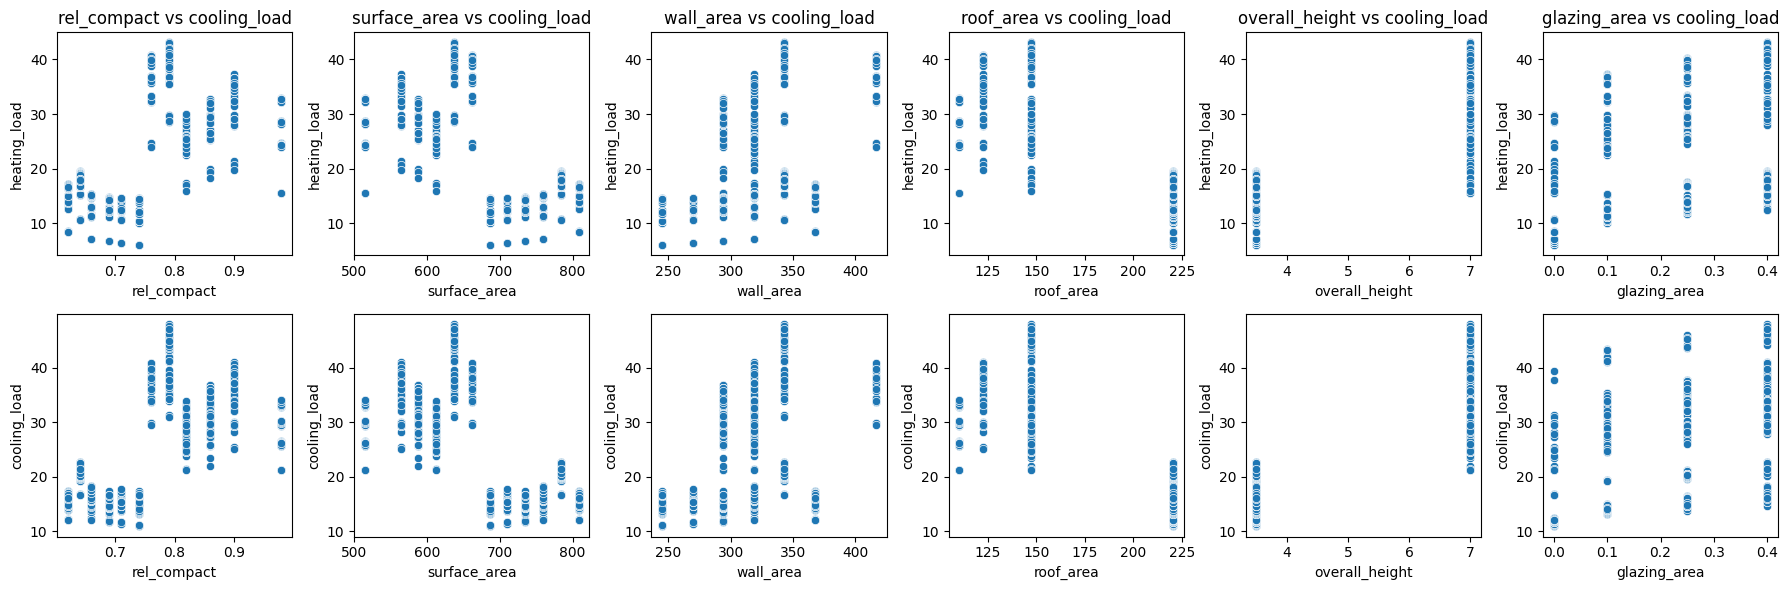

In [53]:
input_columns = ["rel_compact", "surface_area", "wall_area", "roof_area", "overall_height", "glazing_area"]  # Replace with your input columns

n_rows = 2
n_cols = len(input_columns)

# Create a figure and a set of subplots
fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

for i, input_col in enumerate(input_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=energy[input_col], y=energy["heating_load"], ax=ax[0, i-1])
    plt.title(f'{input_col} vs heating_load')

for i, input_col in enumerate(input_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=energy[input_col], y=energy["cooling_load"], ax=ax[1, i-1])
    plt.title(f'{input_col} vs cooling_load')


plt.tight_layout()
plt.show()


## Airfoil

In [7]:
airfoil = pd.read_csv("data/airfoil.csv")

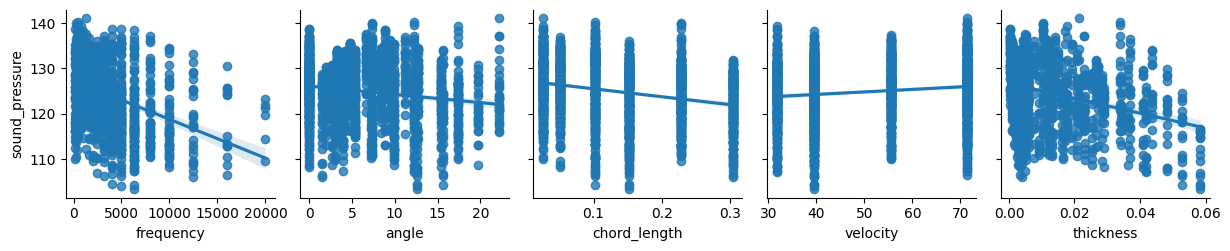

In [12]:
sns.pairplot(airfoil, x_vars=["frequency", "angle", "chord_length", "velocity", "thickness"], y_vars=["sound_pressure"], kind="reg")

## Concrete

In [20]:
concrete = pd.read_csv("data/raw/concrete.csv")

In [22]:
concrete.columns = ["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate", "age", "compressive_strength"]
concrete.to_csv("data/concrete.csv", index=False)

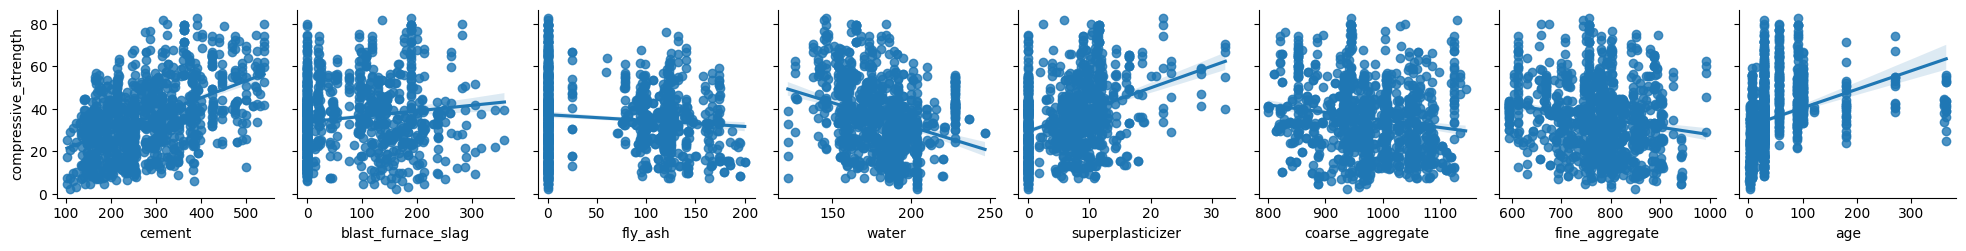

In [24]:
sns.pairplot(concrete, 
    x_vars=[
        "cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer", 
        "coarse_aggregate", "fine_aggregate", "age"
    ], y_vars=["compressive_strength"], kind="reg"
)

## Air Quality